# Εισαγωγή

#### Επιλέξαμε ως πηρύνα της ανάλυσής μας τις προκληθείσες καταστροφές σε σχέση με το είδος του φαινομένου, την τοποθεσία και το χρόνο. Έτσι, η ανάλυση μας μπορεί να συνοψισθεί στα εξής μέρη:

#### - Η σχέση των καταστροφών με το είδος του φαινομένου
#### - Η εξέλιξη των καταστροφών στο χρόνο
#### - Οι καταστροφές που έχουν προκληθεί ανά πολιτεία

# Ανάλυση σχέσης καταστροφών - φαινομένου 

#### Εισάγουμε τις βιβλιοθήκες και τα modules που θα χρειαστούμε

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

### Preprocessing 

#### διαβάζουμε τα δεδομένα σε data frame και αφαιρούμε στήλες τις οποίες δε θα χρειαστούμε στην ανάλυση.

In [2]:
df = pd.read_csv('./preprocessed_data.csv',low_memory=False)  
print('dataset size: ', len(df))

dataset size:  1638489


In [3]:
# sort by date
df2 = df.sort_values(by='event_begin_time')
# unique event types
print('unique event types: ')
for i in df2['event_type'].unique(): print(i)

unique event types: 
tornado
hail
thunderstorm wind
snow
wind
winter storm
lightning
flood
ice storm
hurricane
winter weather
cold/wind chill
dense fog
frost/freeze
flash flood
heavy rain
storm
drought
funnel cloud
debris flow
wildfire
dust devil
rip current
tropical storm
storm surge/tide
freezing fog
marine high wind
sleet
astronomical low tide
excessive heat
landslide
tropical depression


#### Όπως είπαμε, πηρύνας της ανάλυσης είναι οι καταστροφές (damages). Αρχικά βλέπουμε για κάθε είδος καταστροφής, ποια είναι τα 10 φαινόμενα που ευθύνονται για αυτές και τα αντίστοιχα ποσοστά τους. 

In [4]:
print('damage crops\n\n',pd.to_numeric(df2.groupby('event_type')['damage_crops'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x)[:10])/pd.to_numeric(df2.groupby('event_type')['damage_crops'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x)[:10]).sum())
print('\n')

print('damage property\n\n',pd.to_numeric(df2.groupby('event_type')['damage_property'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x)[:10])/pd.to_numeric(df2.groupby('event_type')['damage_property'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x)[:10]).sum())
print('\n')

print('damage deaths\n\n',pd.to_numeric(df2.groupby('event_type')['deaths'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x)[:10])/pd.to_numeric(df2.groupby('event_type')['deaths'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x)[:10]).sum())
print('\n')

print('injuries\n\n',pd.to_numeric(df2.groupby('event_type')['injuries'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x)[:10])/pd.to_numeric(df2.groupby('event_type')['injuries'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x)[:10]).sum())

damage crops

 event_type
drought              0.460665
hurricane            0.149009
flood                0.097085
frost/freeze         0.080233
hail                 0.069476
flash flood          0.041227
cold/wind chill      0.033861
thunderstorm wind    0.027853
tropical storm       0.020658
wind                 0.019933
Name: damage_crops, dtype: float64


damage property

 event_type
tornado              0.259721
hurricane            0.193601
flash flood          0.149535
flood                0.108737
storm surge/tide     0.106423
hail                 0.053988
wildfire             0.049959
tropical storm       0.029644
thunderstorm wind    0.027815
wind                 0.020577
Name: damage_property, dtype: float64


damage deaths

 event_type
tornado              0.347751
drought              0.153518
flash flood          0.092618
hurricane            0.069262
thunderstorm wind    0.062860
rip current          0.057958
wind                 0.057266
lightning            0.054671
f

#### Επειδή τα είδη των φαινομένων είναι πολλά (61), θα κρατήσουμε αυτά που παρουσιάζουν τη μεγαλύτερη συχνότητα εμφανίσεων. Συγκεκριμένα θα κραηοσουμε αυτά τα οποία έχουν ποσοστό εμφάνισης όλα αυτά τα χρόνια >3% επί του συνόλου, και τα υπόλοιπα θα τα κρατήσουμε σε μια κατηγορία ('else')

In [5]:
# sum of damage in USD in crops
sum_cr = pd.to_numeric(df2.groupby('event_type')['damage_crops'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x)).sum()

# percentage for which every event type accounts for in crop damage
pd.to_numeric(df2.groupby('event_type')['damage_crops'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_cr * 100

''' θα κρατήσουμε αυτά που έχουν ποσοστό >3% '''

events_crops = (pd.to_numeric(df2.groupby('event_type')['damage_crops'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_cr * 100).loc[(pd.to_numeric(df2.groupby('event_type')['damage_crops'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_cr * 100)>3]
events_crops


''' προσθέτουμε όλα τα υπόλοιπα και τα αποθηκεύουμε σαν else για να μην είναι πολλά τα κομμάτια του pie chart
δεν μπορούμε να τα αφαιρέσουμε και τελειώς γιατί όλα μαζί πιάνουν ~10%'''

events_crops['else'] = (pd.to_numeric(df2.groupby('event_type')['damage_crops'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_cr * 100)[(pd.to_numeric(df2.groupby('event_type')['damage_crops'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_cr * 100)<3].sum()
events_crops

event_type
drought            44.720573
hurricane          14.465545
flood               9.424860
frost/freeze        7.788891
hail                6.744567
flash flood         4.002282
cold/wind chill     3.287151
else                9.566131
Name: damage_crops, dtype: float64

### Διαγράμματα καταστροφών-φαινομένων

#### Για κάθε είδος καταστροφής φτιάχνουμε ένα pie chart το οποίο δείχνει σε τι ποσοστό ευθύνεται κάθε φαινόμενο (από αυτά που κρατήσαμε)

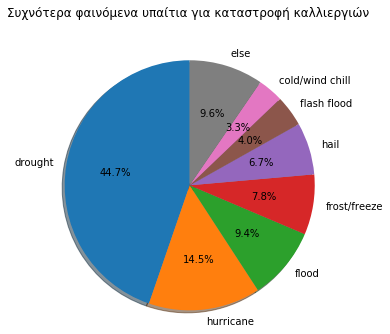

In [6]:
# Pie chart
labels = list(events_crops.index)
sizes = list(events_crops.values)
explode = (0,0,0,0,0,0,0,0)  # none "explodes"

fig1, ax1 = plt.subplots()

fig1.set_size_inches(5,5)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Συχνότερα φαινόμενα υπαίτια για καταστροφή καλλιεργιών', fontsize=12, loc = 'center', y=1.1)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('pie1.jpg')

plt.show()

#### Παρατηρούμε ότι η ξηρασία είναι με μεγάλη διαφορά (44%) η πρώτη αιτία καταστροφής των καλλιεργιών. ακολουθούν οι τυφώνες (15%), οι πλημμύρες (10%), οι παγετώνες (8%) και το χαλάζι (6%).

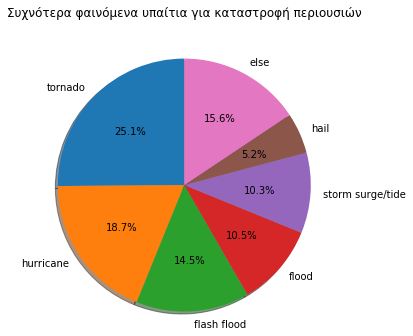

In [7]:
# sum of damage in USD in property
sum_pr = pd.to_numeric(df2.groupby('event_type')['damage_property'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x)).sum()

# percentage for which every event type accounts for in crop damage
pd.to_numeric(df2.groupby('event_type')['damage_property'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_pr * 100

''' θα κρατήσουμε αυτά που έχουν ποσοστό >5% '''

events_prop = (pd.to_numeric(df2.groupby('event_type')['damage_property'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_pr * 100).loc[(pd.to_numeric(df2.groupby('event_type')['damage_property'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_pr * 100)>5]
events_prop


''' προσθέτουμε όλα τα υπόλοιπα και τα αποθηκεύουμε σαν else για να μην είναι πολλά τα κομμάτια του pie chart
δεν μπορούμε να τα αφαιρέσουμε και τελειώς γιατί όλα μαζί πιάνουν ~10%'''

events_prop['else'] = (pd.to_numeric(df2.groupby('event_type')['damage_property'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_pr * 100)[(pd.to_numeric(df2.groupby('event_type')['damage_property'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_pr * 100)<5].sum()
events_prop

# Pie chart
labels = list(events_prop.index)
sizes = list(events_prop.values)
explode = None  # none "explodes"

fig1, ax1 = plt.subplots()

fig1.set_size_inches(5,5)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Συχνότερα φαινόμενα υπαίτια για καταστροφή περιουσιών', fontsize=12, loc = 'center', y=1.1)

plt.savefig('pie2.jpg')

plt.show()

#### Η καταστροφή περιουσιών παρουσιάζει μικρότερες διαφορές. Η πρώτη αιτία εδώ είναι οι τυφώνες (20%), οι ξαφνικές πλημμύρες (18%) οι πλημμύρες σε παράκτιες περιοχές (16%) και οι ανεμοστρόβιλοι (14%)

A Flash Flood is a flood caused by heavy or excessive rainfall in a short period of time, generally less than 6 hours

A Flood is an overflow of water onto normally dry land. The inundation of a normally dry area caused by rising water in an existing waterway, such as a river, stream, or drainage ditch. Ponding of water at or near the point where the rain fell. Flooding is a longer term event than flash flooding: it may last days or weeks.



In [8]:
# κρατάμε τα κοινώς εμφανιζόμενα storms στις λίστες με τα 10 πρώτα για τα crops και property damage

common = []
for i in events_crops.index:
    if i in events_prop.index:
        common.append(i)
        

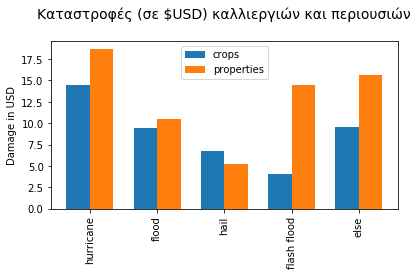

<Figure size 576x576 with 0 Axes>

In [9]:
'''Bar chart for both property-crop damage'''

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(8,8))
rects1 = ax.bar(np.arange(len(events_crops[common])) - width/2, events_crops[common], width, label='crops')
rects2 = ax.bar(np.arange(len(events_prop[common])) + width/2, events_prop[common], width, label='properties')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Damage in USD')
ax.set_title('Καταστροφές (σε $USD) καλλιεργιών και περιουσιών', fontsize=14, y=1.1)
ax.set_xticks(np.arange(len(common)))
ax.set_xticklabels(common, rotation=90)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('barplot1.jpg')

plt.show()

#### Το παραπάνω barplot δείχνει συγκριτικά πόσο επηρεάστηκαν οι καλλιέργειες και οι ανθρώπινες περιουσίες από βασικά και κοινά storms

#### Τα αντίστοιχα pie charts για τους θανάτους και τους τραυματισμούς

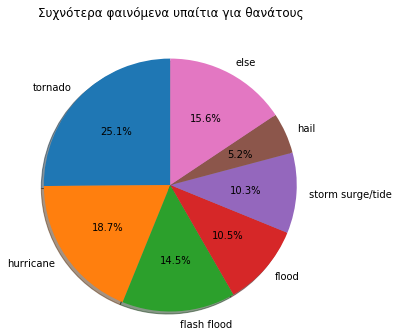

In [10]:
# total deaths
sum_de = pd.to_numeric(df2.groupby('event_type')['deaths'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x)).sum()

# percentage for which every event type accounts for in crop damage
pd.to_numeric(df2.groupby('event_type')['deaths'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_de * 100

''' θα κρατήσουμε αυτά που έχουν ποσοστό >4% '''

events_deaths = (pd.to_numeric(df2.groupby('event_type')['deaths'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_de * 100).loc[(pd.to_numeric(df2.groupby('event_type')['deaths'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_de * 100)>4]
events_deaths


''' προσθέτουμε όλα τα υπόλοιπα και τα αποθηκεύουμε σαν else για να μην είναι πολλά τα κομμάτια του pie chart
δεν μπορούμε να τα αφαιρέσουμε και τελειώς γιατί όλα μαζί πιάνουν ~10%'''

events_deaths['else'] = (pd.to_numeric(df2.groupby('event_type')['deaths'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_de * 100)[(pd.to_numeric(df2.groupby('event_type')['deaths'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_de * 100)<4].sum()
events_deaths

# Pie chart
labels = list(events_prop.index)
sizes = list(events_prop.values)
explode = None  # none "explodes"

fig1, ax1 = plt.subplots()

fig1.set_size_inches(5,5)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Συχνότερα φαινόμενα υπαίτια για θανάτους', fontsize=12, loc = 'center', y=1.1)

plt.savefig('pie3.jpg')

plt.show()

#### Οι τυφώνες και οι ξαφνικές πλημμύρες, καθώς και οι πλημμύρες σε παράκτιες περιοχές ευθύνονται για παραπάνω από το 50% του συνόλου των θανάτων.

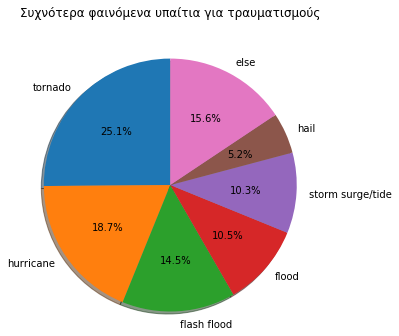

In [11]:
# total injuries
sum_inj = pd.to_numeric(df2.groupby('event_type')['injuries'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x)).sum()

# percentage for which every event type accounts for in crop damage
pd.to_numeric(df2.groupby('event_type')['injuries'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_inj * 100

''' θα κρατήσουμε αυτά που έχουν ποσοστό >4% '''

events_inj = (pd.to_numeric(df2.groupby('event_type')['deaths'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_inj * 100).loc[(pd.to_numeric(df2.groupby('event_type')['deaths'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_inj * 100)>3]
events_inj


''' προσθέτουμε όλα τα υπόλοιπα και τα αποθηκεύουμε σαν else για να μην είναι πολλά τα κομμάτια του pie chart
δεν μπορούμε να τα αφαιρέσουμε και τελειώς γιατί όλα μαζί πιάνουν ~10%'''

events_inj['else'] = (pd.to_numeric(df2.groupby('event_type')['injuries'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_inj * 100)[(pd.to_numeric(df2.groupby('event_type')['injuries'].sum().sort_values(
    ascending=False)[:30].apply(lambda x: '%.0f' % x))/sum_inj * 100)<3].sum()
events_inj

# Pie chart
labels = list(events_prop.index)
sizes = list(events_prop.values)
explode = None  # none "explodes"

fig1, ax1 = plt.subplots()

fig1.set_size_inches(5,5)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Συχνότερα φαινόμενα υπαίτια για τραυματισμούς', fontsize=12, loc = 'center', y=1.1)

plt.savefig('pie4.jpg')

plt.show()

#### Το ίδιο ακριβώς ισχύει για τους τραυματισμούς όπως δείχνει το παραπάνω διάγραμμα

number of event types with >0.01% occurence:  12




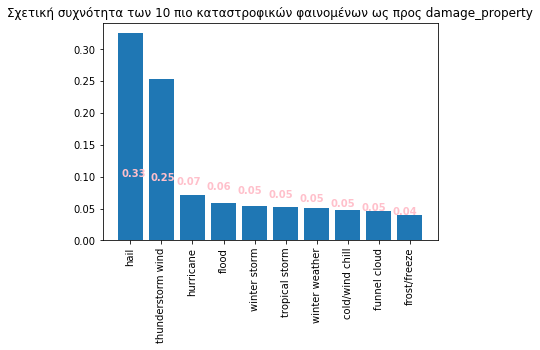

In [27]:
# Πόσες εμφανίσεις έχει το κάθε event type
df2 = df.sort_values(by='damage_property')
print('number of event types with >0.01% occurence: ', len(df2['event_type'].value_counts().loc[df2['event_type'].value_counts()/len(df2['event_type'])>0.01]))
print('\n')


# histogram με το frequency των 10 πιο συχνών events 


a=df2['event_type'].unique()[:10],df2['event_type'].value_counts()[:10]/df2['event_type'].value_counts()[:10].sum()

fig, ax = plt.subplots()
ax.bar(np.arange(len(a[1])),a[1])
ax.set_xticks(np.arange(len(a[1])))
ax.set_xticklabels(a[0], rotation=90)
  
for i, v in enumerate(a[1].round(2)):
    ax.text(v+i-.6 , 0.1-i/150, str(v), color='pink', fontweight='bold')    
plt.title('Σχετική συχνότητα των 10 πιο καταστροφικών φαινομένων ως προς damage_property', y=1, fontsize=12)

plt.show()


## Death analysis. Basic statistics and plots

#### Το παρακάτω είναι ένα διάγραμμα πλήθους θανάτων που παρατηρούνται σε ένα φαινόμενο και των συχνοτήτων τους. Δημιουργεί μια υπερβολική καμπύλη που δείχνει πως μικρό πλήθος θανάτων (<10) έχει πολύ υψηλή συχνότητα ενώ μεγάλο πλήθος θανάτων χαμηλή συχνότητα. 
#### Σημαντική σημείωση: Από τα δεδομένα για το πλήθος των θανάτων δε συμπεριλάβαμε τις τιμές 1-6 (όταν τόσοι άνθρωποι πέθαναν δηλαδή) καθώς και την τελευταία παρατήρηση γιατί ήταν μεγάλο outlier (648) και κατά συνέπεια παρουσιαζόταν δυσανάγνωστο διάγραμμα.

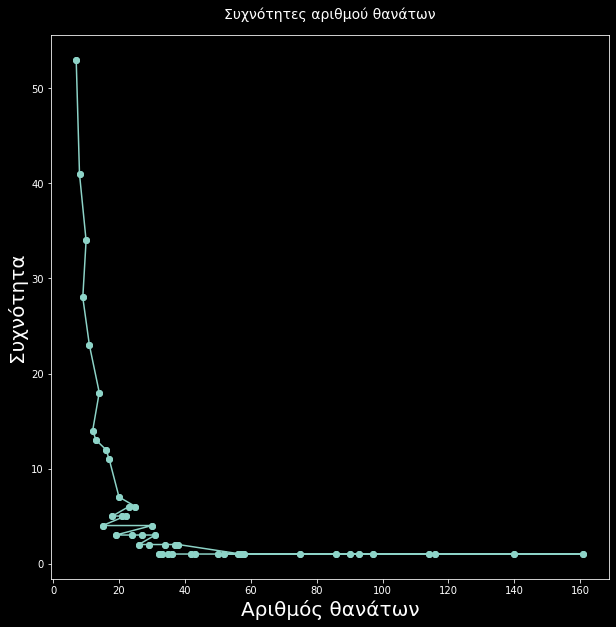

<Figure size 432x288 with 0 Axes>

In [13]:
# scatter plot χωρίς ακράιες τιμές
tmp1 = df2['deaths'].value_counts()

with plt.style.context('dark_background'):

    plt.figure(figsize=(10,10))
    plt.title('Συχνότητες αριθμού θανάτων', fontsize=14, y=1.02)
    plt.ylabel('Συχνότητα', fontsize = 20)
    plt.xlabel('Αριθμός θανάτων', fontsize = 20)
    plt.scatter(list(tmp1[7:-1].index), tmp1[7:-1])
    plt.style.use('dark_background')
plt.plot(list(tmp1[7:-1].index), tmp1[7:-1], '-o')



plt.show()

plt.savefig('scatter1.jpg')

#### Εδώ εξάγουμε περιγραφικά χαρακτηριστικά (μέσα κεντρικής τάσης)

In [14]:
import statistics
from statistics import median

# βγάζουμε το 0 σαν καταχώρηση για να λάβουμε υπόψην μόνο storms που είχανε θύματα
ds_deaths = df2['deaths'].loc[df2['deaths'] != 0]

# for the weighted average of deaths
print('mean without the outlier value 638: ', round(ds_deaths.loc[ds_deaths!=638].mean(),3), '\n')
print('deaths average : ', round(ds_deaths.mean(),3), '\n')
print('std : ', round(ds_deaths.std(),3), '\n')
print('median: ' , ds_deaths.median(), '\n')
print('total number of deaths caused by storms: ', ds_deaths.value_counts().sum(), '\n')

mean without the outlier value 638:  1.813 

deaths average :  1.868 

std :  7.239 

median:  1.0 

total number of deaths caused by storms:  11404 



In [15]:
# death-grouping
if True:
    print('>100\n', ds_deaths.loc[ds_deaths > 100].value_counts(), '\n')
    print('50-100\n', (ds_deaths.loc[(ds_deaths < 101) & (ds_deaths > 50)].value_counts(), '\n'))
    print('30-50\n', (ds_deaths.loc[(ds_deaths < 51) & (ds_deaths > 30)].value_counts(), '\n'))
    print('20-30\n', (ds_deaths.loc[(ds_deaths < 31) & (ds_deaths > 20)].value_counts(), '\n'))
    print('10-20\n', (ds_deaths.loc[(ds_deaths < 21) & (ds_deaths > 10)].value_counts(), '\n'))
    print('1-10\n', (ds_deaths.loc[(ds_deaths < 11) & (ds_deaths > 0)].value_counts(), '\n'))


>100
 638    1
140    1
116    1
114    1
161    1
Name: deaths, dtype: int64 

50-100
 (93    1
86    1
75    1
90    1
57    1
56    1
97    1
52    1
58    1
Name: deaths, dtype: int64, '\n')
30-50
 (31    3
34    2
38    2
37    2
43    1
42    1
36    1
35    1
50    1
33    1
32    1
Name: deaths, dtype: int64, '\n')
20-30
 (25    6
23    6
22    5
21    5
30    4
27    3
24    3
29    2
26    2
Name: deaths, dtype: int64, '\n')
10-20
 (11    23
14    18
12    14
13    13
16    12
17    11
20     7
18     5
15     4
19     3
Name: deaths, dtype: int64, '\n')
1-10
 (1     8661
2     1508
3      458
4      221
5      132
6       92
7       53
8       41
10      34
9       28
Name: deaths, dtype: int64, '\n')


#### Χωρίζουμε σε 4 groups το πλήθος των καταγεγραμμένων θανάτων. 
-  more than 100
- 30-100
- 10-30
- 5-10

#### Για deaths<6 οι εμφανίσεις είναι πολύ μεγάλες και θα αλλοιώσει τη γραφική αναπαράσταση σε barplot, οπότε κάνουμε ξεχωριστό διάγραμμα.

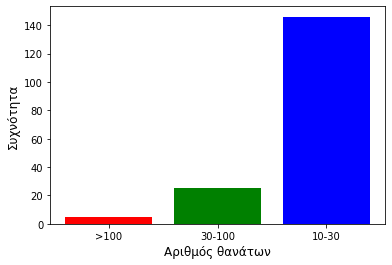

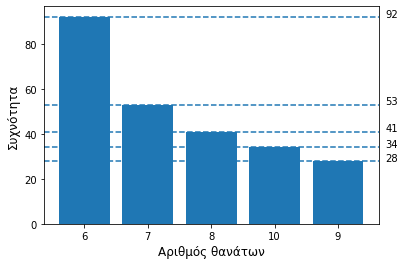

In [16]:
gr1 = ds_deaths.loc[ds_deaths > 100].value_counts()  # >100
gr2 = ds_deaths.loc[(ds_deaths < 101)&(ds_deaths > 30)].value_counts()  # 30-100
gr3 = ds_deaths.loc[(ds_deaths < 31)&(ds_deaths > 10)].value_counts()  # 10-30
gr4 = ds_deaths.loc[ds_deaths < 11].value_counts()  # <= 10



fig, ax = plt.subplots()
ax.bar(np.arange(3),[gr1.sum(), gr2.sum(), gr3.sum()], color=['r','g','b'])
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['>100', '30-100', '10-30'])
ax.set_xlabel('Αριθμός θανάτων', fontsize = 12)
ax.set_ylabel('Συχνότητα', fontsize = 12)
plt.show()




fig, ax = plt.subplots()
ax.bar(np.arange(len(gr4[5:])),gr4[5:])
ax.set_xticks(np.arange(len(gr4[5:])))
ax.set_xticklabels(gr4.index[5:])
ax.axhline(gr4[5:].iloc[0], color='#1f77b4', ls='--')
ax.text(1.02, gr4[5:].iloc[0], str(gr4[5:].iloc[0]), transform=ax.get_yaxis_transform())
ax.axhline(gr4[5:].iloc[1], color='#1f77b4', ls='--')
ax.text(1.02, gr4[5:].iloc[1], str(gr4[5:].iloc[1]), transform=ax.get_yaxis_transform())
ax.axhline(gr4[5:].iloc[2], color='#1f77b4', ls='--')
ax.text(1.02, gr4[5:].iloc[2], str(gr4[5:].iloc[2]), transform=ax.get_yaxis_transform())
ax.axhline(gr4[5:].iloc[3], color='#1f77b4', ls='--')
ax.text(1.02, gr4[5:].iloc[3], str(gr4[5:].iloc[3]), transform=ax.get_yaxis_transform())
ax.axhline(gr4[5:].iloc[4], color='#1f77b4', ls='--')
ax.text(1.02, gr4[5:].iloc[4], str(gr4[5:].iloc[4]), transform=ax.get_yaxis_transform())
ax.set_xlabel('Αριθμός θανάτων', fontsize = 12)
ax.set_ylabel('Συχνότητα', fontsize = 12)

plt.show()




## Injuries analysis. Basic statistics and plots

#### Ομοίως κάποια περιγραφικά στατιστικά και διαγράμματα για τους τραυματισμούς

10 - 20 injuries :  1137 

20 - 30 injuries :  440 

30 - 40 injuries :  220 

40 - 50 injuries :  168 

50 - 60 injuries :  92 

60 - 70 injuries :  56 

70 - 80 injuries :  53 

80 - 90 injuries :  25 

90 - 100 injuries :  45 



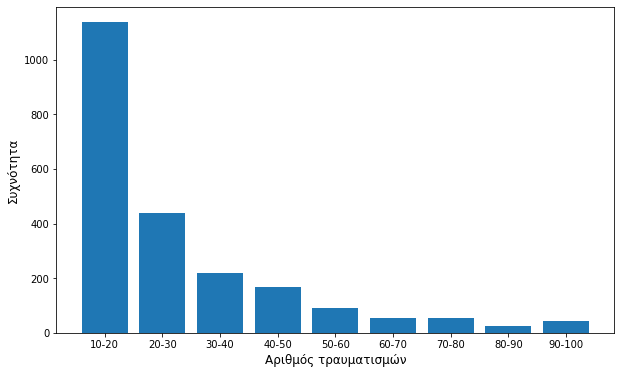

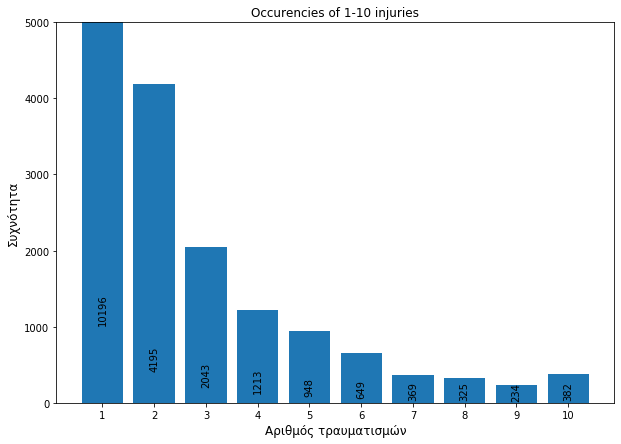

In [29]:
# κρατάμε τις περιπτώσεις όπου υπήρχαν injuries, άρα βγάζουμε το 0
ds_inj = df2['injuries'].loc[df2['injuries']!=0]


# θα κανουμε ενα ιστογραμμα αρχικα με το εξης παρακάτω groupping σε bins των δεκάδων (>100 -> 1 bin)
tmp = []
tmp_labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
step = 10
for per in range(10,100, step):
    print(per, '-', per+step, 'injuries : ',ds_inj.loc[(ds_inj<per+step+1)&(ds_inj>per)].value_counts().sum(), '\n')
    tmp.append(ds_inj.loc[(ds_inj<per+step+1)&(ds_inj>per)].value_counts().sum())

if True:
 
    fig, ax = plt.subplots()
    ax.bar(np.arange(len(tmp)),tmp)
    ax.set_xticks(np.arange(len(tmp)))
    ax.set_xticklabels(tmp_labels)
    fig.set_size_inches(10,6)
    ax.set_xlabel('Αριθμός τραυματισμών', fontsize = 12)
    ax.set_ylabel('Συχνότητα', fontsize = 12)

    plt.show()


# αντίστοιχα θα κάνουμε για τα 1-10 injuries

tmp1 = ds_inj.loc[ds_inj<11].value_counts()
tmp1.reset_index().columns = ['injuries', 'index']
tmp1 = tmp1.reset_index().rename(columns={"index": "frequency", "injuries": "number of injuries"})
ys = tmp1.sort_values(by='frequency')['number of injuries']
xs = tmp1.sort_values(by='frequency')['frequency']

fig, ax = plt.subplots()
fig.set_size_inches(10,7)
bar_x = xs
bar_height = ys
bar_tick_label = [ys.iloc[0],ys.iloc[1], ys.iloc[2], ys.iloc[3], ys.iloc[4], ys.iloc[5], ys.iloc[6],
                 ys.iloc[7], ys.iloc[8], ys.iloc[9]]
bar_label = bar_tick_label
ax.set_xlabel('Αριθμός τραυματισμών', fontsize = 12)
ax.set_ylabel('Συχνότητα', fontsize = 12)

bar_plot = plt.bar(bar_x,bar_height,tick_label=xs)

def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        if True: #idx == 0:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 0.1*height,
                    bar_label[idx],
                    ha='center', va='bottom', rotation=90)

autolabel(bar_plot)

plt.ylim(0,5000)

plt.title('Occurencies of 1-10 injuries')

plt.savefig("add_text_bar_matplotlib_03.png", bbox_inches='tight')
plt.show()


In [18]:
print('mean of injuries: ' , round(ds_inj.mean(),2), '\n')
print('std of injuries: ' , round(ds_inj.std(),2), '\n')
print('median of injuries: ' , round(ds_inj.median(),2), '\n')

mean of injuries:  7.33 

std of injuries:  36.05 

median of injuries:  2.0 

